In [1]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines
from sklearn import linear_model, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import & Preprocess Data

In [2]:
data = pd.read_csv('../data/master_reduced.csv')
data = data[data.columns.difference(['year', 'data_year', 'cfips', 'county', 'state'])]
data['microbusiness_density'].describe()

count    12456.000000
mean         3.810892
std          4.708348
min          0.007172
25%          1.643694
50%          2.592647
75%          4.507900
max        172.027446
Name: microbusiness_density, dtype: float64

In [3]:
# Scale all features
scaler = StandardScaler()
scaled_data = pd.DataFrame(data = scaler.fit_transform(data), columns = scaler.get_feature_names_out())
scaled_data.head()

y_mean = scaler.mean_[3]
y_var = scaler.var_[3]

In [4]:
X = scaled_data[scaled_data.columns.difference(['microbusiness_density'])]
y = scaled_data.microbusiness_density

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed)
y_test_unscaled = y_test.map(lambda z: z*math.sqrt(y_var) + y_mean)
y_train_unscaled = y_train.map(lambda z: z*math.sqrt(y_var) + y_mean)

# Linear Regression (No Scaling)

In [5]:
X_ns_train, X_ns_test, y_ns_train, y_ns_test = train_test_split(data[data.columns.difference(['microbusiness_density'])], data.microbusiness_density, test_size = 0.4, random_state = seed)

# Fit model, find coefficients
linear_ns = linear_model.LinearRegression().fit(X_ns_train, y_ns_train)
linear_ns_coefs = pd.DataFrame({'feature': X.columns, 'coef': linear_ns.coef_})

# Find performance on train set
print("Train R-squared: " + str(linear_ns.score(X_ns_train, y_ns_train)))

linear_ns_y_train_pred = linear_ns.predict(X_ns_train)
print("Train RMSE: " + str(mean_squared_error(y_ns_train, linear_ns_y_train_pred, squared=False)))

Train R-squared: 0.34203529715306646
Train RMSE: 4.089900323220946


Test R-squared: 0.4180870853463041
3.1698959074983253
Test RMSE: 3.1698959074983253


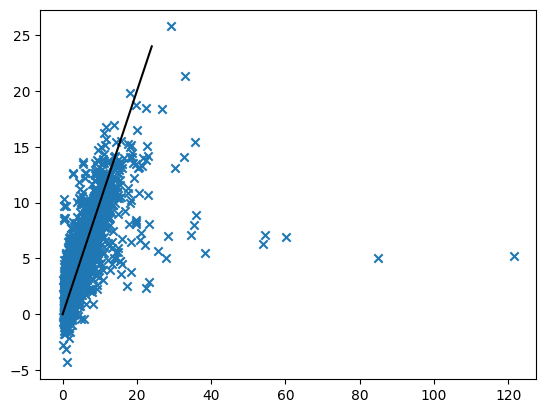

In [6]:
# Find performance on test set
print("Test R-squared: " + str(linear_ns.score(X_ns_test, y_ns_test)))

linear_ns_y_test_pred = linear_ns.predict(X_ns_test)
linear_ns_test_rmse = mean_squared_error(y_ns_test, linear_ns_y_test_pred, squared=False)
print(math.sqrt(statistics.mean((linear_ns_y_test_pred - y_ns_test)*(linear_ns_y_test_pred - y_ns_test))))
print("Test RMSE: " + str(linear_ns_test_rmse))

# Plot result differences (just to see)
linear_ns_test_results = pd.DataFrame({'y_pred': linear_ns_y_test_pred, 'y_true': y_ns_test})
linear_ns_fig, linear_ns_plot = plt.subplots()
linear_ns_plot.plot(range(25), color='black')
linear_ns_plot.scatter(linear_ns_test_results.y_true, linear_ns_test_results.y_pred, marker='x')

# Linear Regression (w/ Scaling)
Should make no difference with no scaling

In [7]:
# Fit model, find coefficients
linear = linear_model.LinearRegression().fit(X_train, y_train)
linear_coefs = pd.DataFrame({'feature': X.columns, 'coef': linear.coef_})

# Find performance on train set
print("Train R-squared: " + str(linear.score(X_train, y_train)))

linear_y_train_pred = linear.predict(X_train)
linear_y_train_pred = linear_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, linear_y_train_pred, squared=False)))

Train R-squared: 0.34203529715306646
Train RMSE (Unscaled): 4.089900323220946


Test R-squared: 0.4180870853462947
Test RMSE (Unscaled): 3.1698959074983506


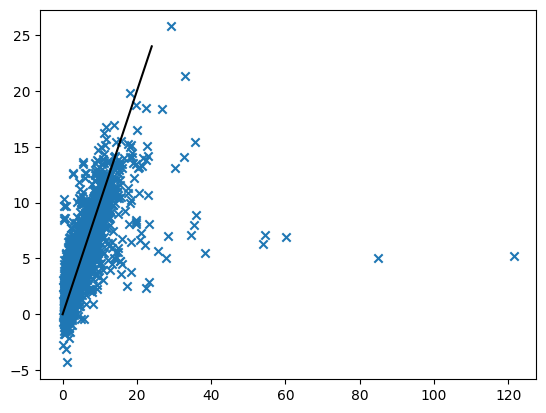

In [8]:
# Find performance on test set
print("Test R-squared: " + str(linear.score(X_test, y_test)))

linear_y_test_pred = linear.predict(X_test)
linear_y_test_pred = linear_y_test_pred*math.sqrt(y_var) + y_mean
linear_test_rmse = mean_squared_error(y_test_unscaled, linear_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(linear_test_rmse))

# Plot result differences (just to see)
linear_test_results = pd.DataFrame({'y_pred': linear_y_test_pred, 'y_true': y_test_unscaled})
linear_fig, linear_plot = plt.subplots()
linear_plot.plot(range(25), color='black')
linear_plot.scatter(linear_test_results.y_true, linear_test_results.y_pred, marker='x')

# L1 Penalty (Lasso Regression)

In [9]:
# Fit model, find coefficients
lasso = linear_model.LassoCV().fit(X_train, y_train)
print("Alpha selected: " + str(lasso.alpha_))
lasso_coefs = pd.DataFrame({'feature': X.columns, 'coef': lasso.coef_})

# Find performance on train set
print("Train R-squared: " + str(lasso.score(X_train, y_train)))

lasso_y_train_pred = lasso.predict(X_train)
lasso_y_train_pred = lasso_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, lasso_y_train_pred, squared=False)))

Alpha selected: 0.0005314836088808595
Train R-squared: 0.3420319813653254
Train RMSE (Unscaled): 4.089910628655424


Test R-squared: 0.4181942227384928
Test RMSE (Unscaled): 3.169604085469864


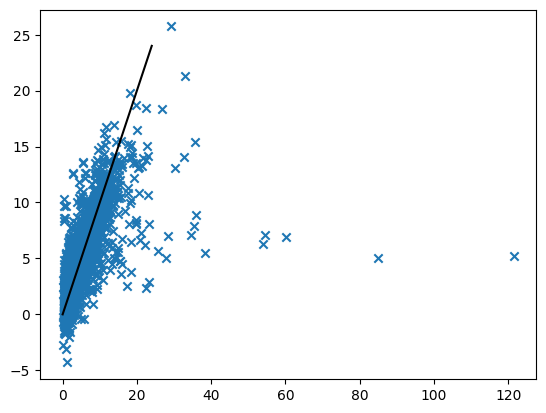

In [10]:
# Find performance on test set
print("Test R-squared: " + str(lasso.score(X_test, y_test)))

lasso_y_test_pred = lasso.predict(X_test)
lasso_y_test_pred = lasso_y_test_pred*math.sqrt(y_var) + y_mean
lasso_test_rmse = mean_squared_error(y_test_unscaled, lasso_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(lasso_test_rmse))

# Plot result differences (just to see)
lasso_test_results = pd.DataFrame({'y_pred': lasso_y_test_pred, 'y_true': y_test_unscaled})
lasso_fig, lasso_plot = plt.subplots()
lasso_plot.plot(range(25), color='black')
lasso_plot.scatter(lasso_test_results.y_true, lasso_test_results.y_pred, marker='x')

# L2 Penalty (Ridge Regression)

In [11]:
# Fit model, find coefficients
ridge = linear_model.RidgeCV().fit(X_train, y_train)
print("Alpha selected: " + str(ridge.alpha_))
ridge_coefs = pd.DataFrame({'feature': X.columns, 'coef': ridge.coef_})

# Find performance on train set
print("Train R-squared: " + str(ridge.score(X_train, y_train)))

ridge_y_train_pred = ridge.predict(X_train)
ridge_y_train_pred = ridge_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, ridge_y_train_pred, squared=False)))

Alpha selected: 10.0
Train R-squared: 0.3420349809419905
Train RMSE (Unscaled): 4.089901306002865


Test R-squared: 0.41813982087211676
Test RMSE (Unscaled): 3.1697522692401354


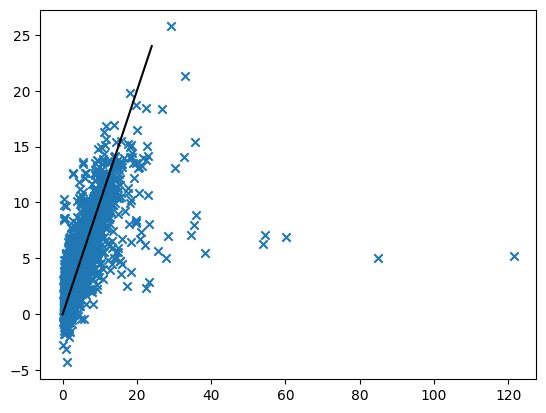

In [12]:
# Find performance on test set
print("Test R-squared: " + str(ridge.score(X_test, y_test)))

ridge_y_test_pred = ridge.predict(X_test)
ridge_y_test_pred = ridge_y_test_pred*math.sqrt(y_var) + y_mean
ridge_test_rmse = mean_squared_error(y_test_unscaled, ridge_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(ridge_test_rmse))

# Plot result differences (just to see)
ridge_test_results = pd.DataFrame({'y_pred': ridge_y_test_pred, 'y_true': y_test_unscaled})
ridge_fig, ridge_plot = plt.subplots()
ridge_plot.plot(range(25), color='black')
ridge_plot.scatter(ridge_test_results.y_true, ridge_test_results.y_pred, marker='x')

# L1 & L2 Penalties (ElasticNet)

In [13]:
# Fit model, find coefficients
en = linear_model.ElasticNetCV().fit(X_train, y_train)
print("Alpha selected: " + str(en.alpha_))
en_coefs = pd.DataFrame({'feature': X.columns, 'coef': en.coef_})

# Find performance on train set
print("Train R-squared: " + str(en.score(X_train, y_train)))

en_y_train_pred = en.predict(X_train)
en_y_train_pred = en_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, en_y_train_pred, squared=False)))

Alpha selected: 0.0011397849056774007
Train R-squared: 0.342031072249407
Train RMSE (Unscaled): 4.08991345417389


Test R-squared: 0.4182236247840023
Test RMSE (Unscaled): 3.1695239951505214


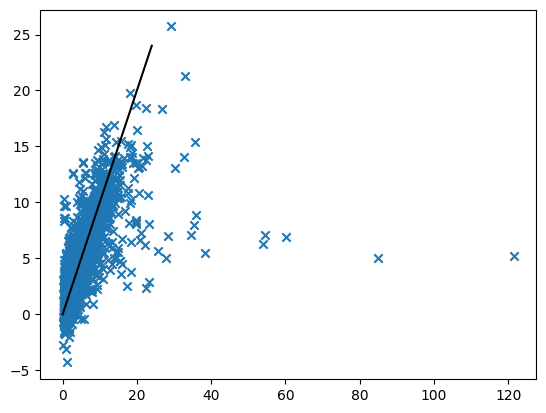

In [14]:
# Find performance on test set
print("Test R-squared: " + str(en.score(X_test, y_test)))

en_y_test_pred = en.predict(X_test)
en_y_test_pred = en_y_test_pred*math.sqrt(y_var) + y_mean
en_test_rmse = mean_squared_error(y_test_unscaled, en_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(en_test_rmse))

# Plot result differences (just to see)
en_test_results = pd.DataFrame({'y_pred': en_y_test_pred, 'y_true': y_test_unscaled})
en_fig, en_plot = plt.subplots()
en_plot.plot(range(25), color='black')
en_plot.scatter(en_test_results.y_true, en_test_results.y_pred, marker='x')

# Errors

In [15]:
results = pd.DataFrame({
    'type': ['Linear (No Scaling)', 'Linear', 'Ridge', 'Lasso', 'ElasticNet'], 
    'test rmse': [linear_ns_test_rmse, linear_test_rmse, ridge_test_rmse, lasso_test_rmse, en_test_rmse]
})
results.loc[results['test rmse'].idxmin()]

type         ElasticNet
test rmse      3.169524
Name: 4, dtype: object

In [16]:
results

,type,test rmse
0,Linear (No Scaling),3.169896
1,Linear,3.169896
2,Ridge,3.169752
3,Lasso,3.169604
4,ElasticNet,3.169524


# SVM

Linear Kernel

In [17]:
# Fit model, find coefficients
svm_lin = svm.SVR(kernel='linear').fit(X_train, y_train)
svm_lin_coefs = pd.DataFrame({'feature': X.columns, 'coef': svm_lin.coef_[0]})

# Find performance on train set
print("Train R-squared: " + str(svm_lin.score(X_train, y_train)))

svm_lin_y_train_pred = svm_lin.predict(X_train)
svm_lin_y_train_pred = svm_lin_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, svm_lin_y_train_pred, squared=False)))

Train R-squared: 0.3164321631322433
Train RMSE (Unscaled): 4.168715295615276


Test R-squared: 0.405230617181909
Test RMSE (Unscaled): 3.204721583497173


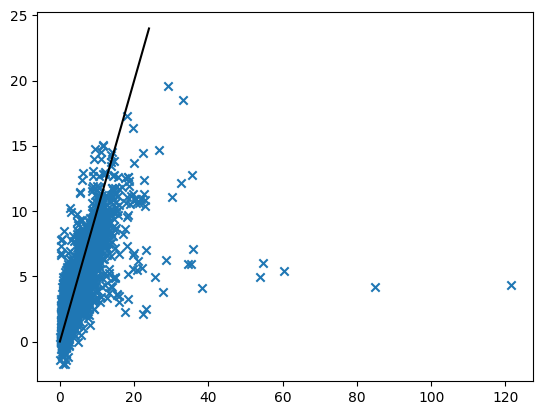

In [18]:
# Find performance on test set
print("Test R-squared: " + str(svm_lin.score(X_test, y_test)))

svm_lin_y_test_pred = svm_lin.predict(X_test)
svm_lin_y_test_pred = svm_lin_y_test_pred*math.sqrt(y_var) + y_mean
svm_lin_test_rmse = mean_squared_error(y_test_unscaled, svm_lin_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(svm_lin_test_rmse))

# Plot result differences (just to see)
svm_lin_test_results = pd.DataFrame({'y_pred': svm_lin_y_test_pred, 'y_true': y_test_unscaled})
svm_lin_fig, svm_lin_plot = plt.subplots()
svm_lin_plot.plot(range(25), color='black')
svm_lin_plot.scatter(svm_lin_test_results.y_true, svm_lin_test_results.y_pred, marker='x')

Poly Kernel

In [19]:
# Fit model, find coefficients
svm_poly = svm.SVR(kernel='poly').fit(X_train, y_train)
# svm_poly_coefs = pd.DataFrame({'feature': X.columns, 'coef': svm_poly.coef_[0]})

# Find performance on train set
print("Train R-squared: " + str(svm_poly.score(X_train, y_train)))

svm_poly_y_train_pred = svm_poly.predict(X_train)
svm_poly_y_train_pred = svm_poly_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, svm_poly_y_train_pred, squared=False)))

Train R-squared: 0.39249276789459453
Train RMSE (Unscaled): 3.9299511486336978


Test R-squared: 0.3241152909924644
Test RMSE (Unscaled): 3.416270996359689


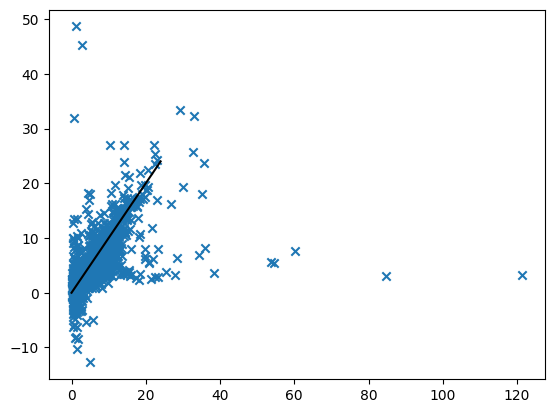

In [20]:
# Find performance on test set
print("Test R-squared: " + str(svm_poly.score(X_test, y_test)))

svm_poly_y_test_pred = svm_poly.predict(X_test)
svm_poly_y_test_pred = svm_poly_y_test_pred*math.sqrt(y_var) + y_mean
svm_poly_test_rmse = mean_squared_error(y_test_unscaled, svm_poly_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(svm_poly_test_rmse))

# Plot result differences (just to see)
svm_poly_test_results = pd.DataFrame({'y_pred': svm_poly_y_test_pred, 'y_true': y_test_unscaled})
svm_poly_fig, svm_poly_plot = plt.subplots()
svm_poly_plot.plot(range(25), color='black')
svm_poly_plot.scatter(svm_poly_test_results.y_true, svm_poly_test_results.y_pred, marker='x')

rbf Kernel

In [26]:
# Fit model, find coefficients
svm_rbf = svm.SVR(kernel='rbf').fit(X_train, y_train)
# svm_poly_coefs = pd.DataFrame({'feature': X.columns, 'coef': svm_poly.coef_[0]})

# Find performance on train set
print("Train R-squared: " + str(svm_rbf.score(X_train, y_train)))

svm_rbf_y_train_pred = svm_rbf.predict(X_train)
svm_rbf_y_train_pred = svm_rbf_y_train_pred*math.sqrt(y_var) + y_mean
print("Train RMSE (Unscaled): " + str(mean_squared_error(y_train_unscaled, svm_rbf_y_train_pred, squared=False)))

Train R-squared: 0.41560191556641024
Train RMSE (Unscaled): 3.8544801864175744


Test R-squared: 0.47879027217786807
Test RMSE (Unscaled): 3.0000069417983997


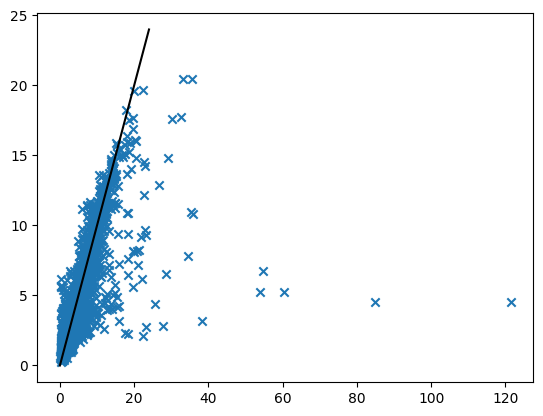

In [27]:
# Find performance on test set
print("Test R-squared: " + str(svm_rbf.score(X_test, y_test)))

svm_rbf_y_test_pred = svm_rbf.predict(X_test)
svm_rbf_y_test_pred = svm_rbf_y_test_pred*math.sqrt(y_var) + y_mean
svm_rbf_test_rmse = mean_squared_error(y_test_unscaled, svm_rbf_y_test_pred, squared=False)
print("Test RMSE (Unscaled): " + str(svm_rbf_test_rmse))

# Plot result differences (just to see)
svm_rbf_test_results = pd.DataFrame({'y_pred': svm_rbf_y_test_pred, 'y_true': y_test_unscaled})
svm_rbf_fig, svm_rbf_plot = plt.subplots()
svm_rbf_plot.plot(range(25), color='black')
svm_rbf_plot.scatter(svm_rbf_test_results.y_true, svm_rbf_test_results.y_pred, marker='x')

# Error

In [23]:
results = pd.DataFrame({
    'type': ['Svm Linear', 'Svm Poly', 'Svm rbf'], 
    'test rmse': [svm_lin_test_rmse, svm_poly_test_rmse, svm_rbf_test_rmse]
})
results.loc[results['test rmse'].idxmin()]

results

,type,test rmse
0,Svm Linear,3.204722
1,Svm Poly,3.416271
2,Svm rbf,3.000007
